In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import imageio.v2 as imageio
from glob import glob
image_name = 'Jun_2019'

## Normalize B8

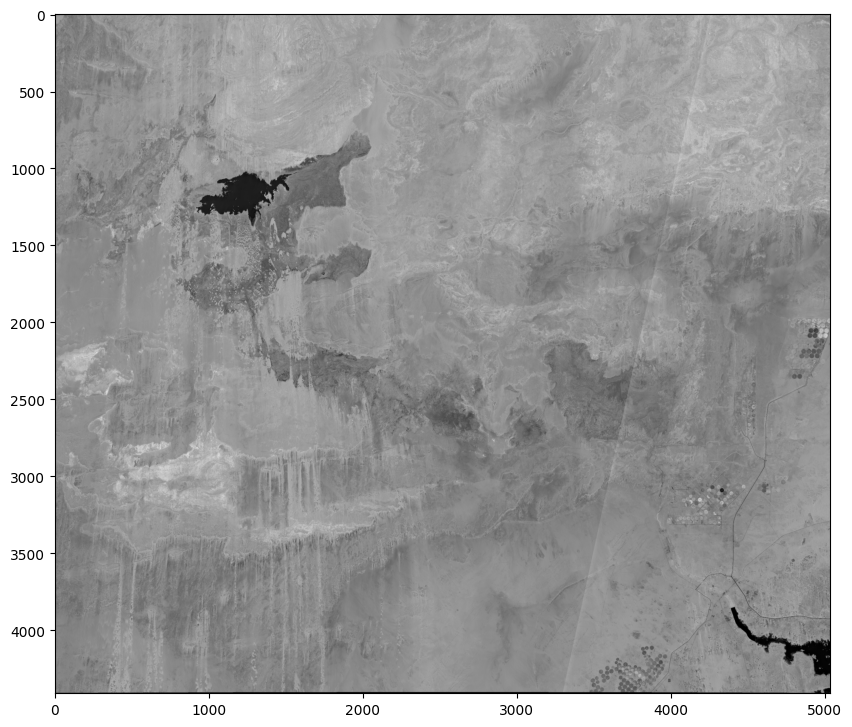

In [2]:
b8_image = cv2.imread(f"preprocess/b8/{image_name}.tif")
plt.figure(figsize=(10,12))
plt.imshow(b8_image, cmap='gray')
plt.show()

In [3]:
dataset = glob("preprocess/b8/*.tif")
pixels_sum = 0
pixels_total = 0
for image_path in dataset:
    image = cv2.imread(image_path)
    pixels_sum += image.sum()
    pixels_total += image.size

pixels_mean = pixels_sum / pixels_total
np.round(pixels_mean,2)

132.99

In [4]:
sum_squared_diff = 0 
for image_path in dataset:
    image = cv2.imread(image_path)
    squared_diff = ((image- pixels_mean)**2).sum()
    sum_squared_diff += squared_diff

In [5]:
std = np.sqrt(sum_squared_diff / pixels_total)
np.round(std,2)

37.32

In [7]:
b8_ds_mean = 132.99
b8_ds_st = 37.32

In [8]:
# Normalize the B8 Dataset
for image_path in dataset:
    b8_image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)
    image_id = image_path.split('/')[-1].split('.')[0]
    normalized_b8_image = (b8_image - b8_ds_mean) / b8_ds_st
    norm_b8 = normalized_b8_image.astype(np.float16)
    imageio.imwrite(f"processed/b8/{image_id}.tif", norm_b8)

In [9]:
norm_sar_image = imageio.imread("processed/b8/Jan_2020.tif")
print(norm_sar_image.min(), norm_sar_image.max()) 
norm_sar_image.mean() , norm_sar_image.astype(np.float32).std()

-3.564 3.27


(-0.1425, 0.97345746)

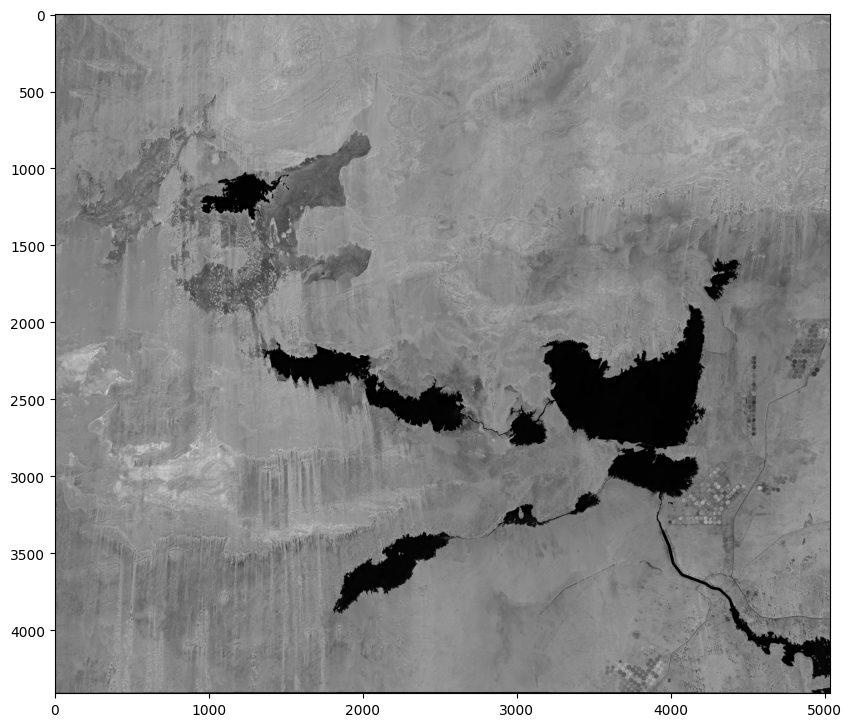

In [10]:
plt.figure(figsize=(10,12))
plt.imshow(norm_sar_image, cmap='gray')
plt.show()